In [4]:
# Environment Set-up

import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np

## **I - Data Preparation**

In [ ]:
pip install --upgrade datasets

In [6]:
from datasets import load_dataset # loading dataset from Hugging face

# 1. Load the full Banking77 dataset (train and test) from Hugging Face
dataset = load_dataset("banking77")

# 2. Extract label names for intent mapping
label_names = dataset['train'].features['label'].names

# 3. Convert to DataFrames and map label numbers to intent names
df_train = pd.DataFrame(dataset['train'])
df_train['intent_name'] = df_train['label'].apply(lambda x: label_names[x])

df_test = pd.DataFrame(dataset['test'])
df_test['intent_name'] = df_test['label'].apply(lambda x: label_names[x])

# 4. Combine both train and test sets into a single DataFrame
Banking77 = pd.concat([df_train, df_test], ignore_index=True)

# 5. Save the combined dataset with human-readable intent labels
Banking77.to_csv("Banking77.csv", index=False)

# Display the first few rows of the dataset
print("Combined Banking77 dataset saved as 'Banking77.csv'")
print("\n", Banking77.head())

Combined Banking77 dataset saved as 'Banking77.csv'

                                                 text  label   intent_name
0                     I am still waiting on my card?     11  card_arrival
1  What can I do if my card still hasn't arrived ...     11  card_arrival
2  I have been waiting over a week. Is the card s...     11  card_arrival
3  Can I track my card while it is in the process...     11  card_arrival
4  How do I know if I will get my card, or if it ...     11  card_arrival



Class Distribution (Counts):
 label
15    227
28    222
6     221
75    220
19    217
     ... 
41    122
18    101
10     99
72     81
23     75
Name: count, Length: 77, dtype: int64

Class Distribution (%):
 label
15    1.735076
28    1.696859
6     1.689215
75    1.681572
19    1.658641
        ...   
41    0.932508
18    0.771994
10    0.756707
72    0.619124
23    0.573263
Name: proportion, Length: 77, dtype: float64


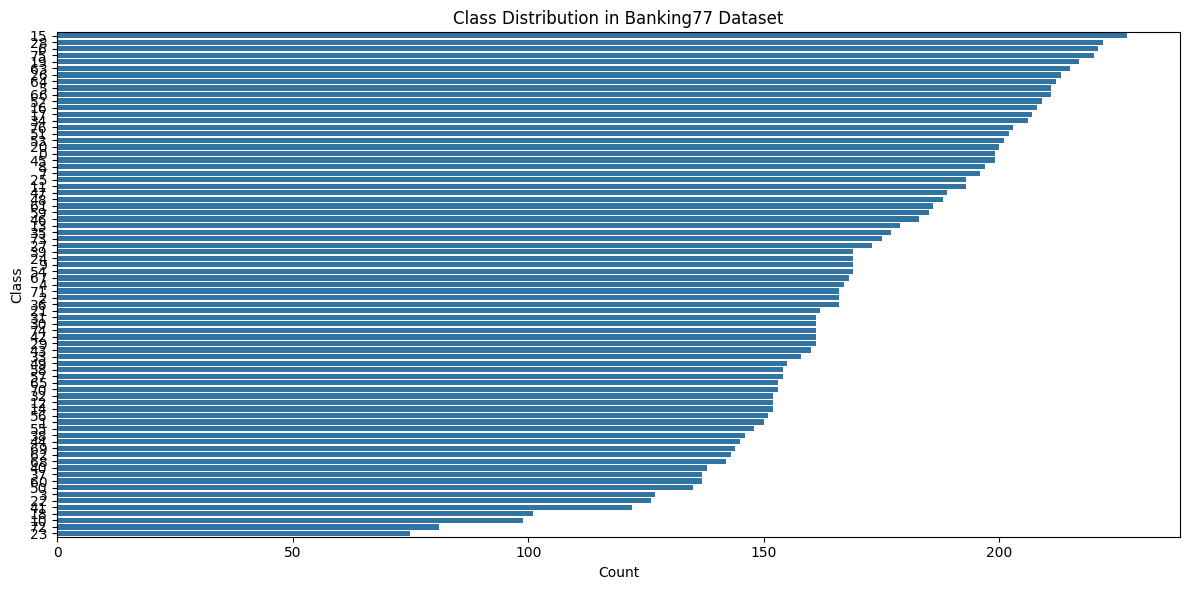


Summary Statistics:
Total classes: 77
Most common class: 15 (227 samples)
Least common class: 23 (75 samples)


In [7]:
# Count the number of samples per intent (label)
class_distribution = Banking77['label'].value_counts()
print("\nClass Distribution (Counts):\n", class_distribution)

# Calculate percentage distribution of each intent class
class_percentages = Banking77['label'].value_counts(normalize=True) * 100
print("\nClass Distribution (%):\n", class_percentages)

# Visualize the distribution of classes
plt.figure(figsize=(12, 6))

# Horizontal bar plot showing the number of samples per class
sns.countplot(data=Banking77, y= 'label', order=class_distribution.index)
plt.title('Class Distribution in Banking77 Dataset')
plt.xlabel('Count')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print(f"Total classes: {len(class_distribution)}")
print(f"Most common class: {class_distribution.idxmax()} ({class_distribution.max()} samples)")
print(f"Least common class: {class_distribution.idxmin()} ({class_distribution.min()} samples)")


/tmp/ipython-input-9-185386817.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Banking20, y='label', order=top_20_classes, palette="viridis")


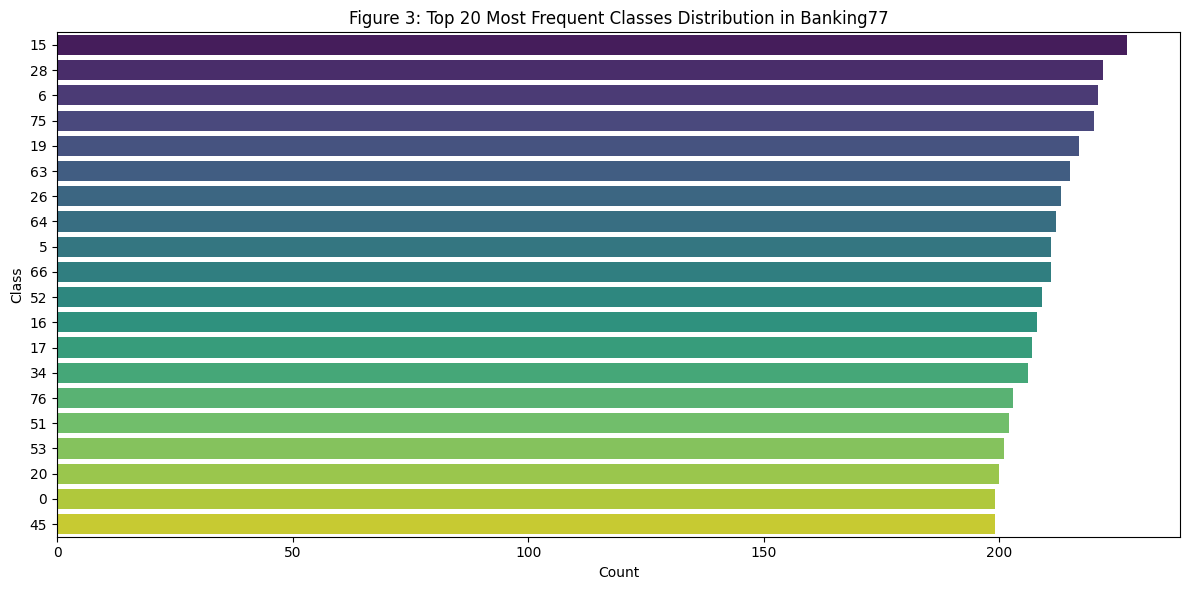


Original dataset size: 13083
Filtered dataset size: 4203
Percentage of data retained: 32.1%


In [9]:
# Identify the 20 most frequent intent classes by label index
top_20_classes = Banking77['label'].value_counts().nlargest(20).index

# Filter the dataset to only include these top 20 intent classes
Banking20 = Banking77[Banking77['label'].isin(top_20_classes)].copy()

# Visualize the distribution of the top 20 classes
plt.figure(figsize=(12, 6))
sns.countplot(data=Banking20, y='label', order=top_20_classes, palette="viridis")
plt.title('Figure 3: Top 20 Most Frequent Classes Distribution in Banking77')
plt.xlabel('Count')
plt.ylabel('Class')
plt.tight_layout()
plt.show()

# Print dataset size and retention percentage
print(f"\nOriginal dataset size: {len(Banking77)}")
print(f"Filtered dataset size: {len(Banking20)}")
print(f"Percentage of data retained: {len(Banking20)/len(Banking77)*100:.1f}%")

In [10]:
# Display the first 20 rows of the Banking20 dataset
print(tabulate(Banking20.head(20), headers='keys', tablefmt='pretty'))

+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+----------------------------------+
|     |                                                                                      text                                                                                      | label |           intent_name            |
+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+----------------------------------+
| 404 |                                          Last Saturday, I was charged extra for the exchange rate on my payment. Is something wrong?                                           |  17   | card_payment_wrong_exchange_rate |
| 405 |          Hi, I am disappointed to see such a bad exchange rate and hope you can 

In [11]:
# Importing text pre-processing libraries

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
# Define the preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower() # Lower case the capital letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english')) # Remove stop words (like "the", "is", "and", etc.)
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer() # Lemmatize each token
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the first column (text) in the DataFrame
text = Banking20.columns[0]
Banking20['processed_text'] = Banking20[text].apply(preprocess_text)

# Verify results
print("Before/After Preprocessing Examples:")
for i in range(3):  # Show first 3 samples
    print(f"\nOriginal: {Banking20[text].iloc[i]}")
    print(f"Processed: {Banking20['processed_text'].iloc[i]}")

Before/After Preprocessing Examples:

Original: Last Saturday, I was charged extra for the exchange rate on my payment. Is something wrong?
Processed: last saturday charged extra exchange rate payment something wrong

Original: Hi, I am disappointed to see such a bad exchange rate and hope you can assist me. Would you be able to confirm the official interbank exchange rate for me?
Processed: hi disappointed see bad exchange rate hope assist would able confirm official interbank exchange rate

Original: I think the currency exchange that's been applied is wrong.
Processed: think currency exchange thats applied wrong


## **II - Can automatically generated sentiment features improve intent classification performance on the Banking77 dataset?**

In [ ]:
!pip install transformers
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [13]:
# Import Hugging Face Transformers tools to load pre-trained tokenizers and models
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Import PyTorch for tensor operations and model handling
import torch

# Import random for reproducible data shuffling or sampling
import random

In [14]:
# Randomly select 200 observations from the Banking20 dataset
Banking20Sample = Banking20.sample(n=200, random_state=42).reset_index(drop=True)

# Save this sample to an Excel file for manual sentiment labeling
Banking20Sample.to_excel("Banking20SampleManual.xlsx", index=False)
files.download("Banking20SampleManual.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# Sentiment Inference Function using FinBERT

from torch.nn.functional import softmax

# Initialize model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = AutoModelForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

def get_sentiment(text, max_length=512):
    """
    Returns the sentiment prediction for a single input text.
    Output labels are 'negative', 'neutral', or 'positive'.
    """
    try:
        # Tokenize the input text with truncation and padding for batch compatibility
        inputs = tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            max_length=max_length,
            padding=True
        )

        # Forward pass through the model without gradient computation
        with torch.no_grad():
            outputs = model(**inputs)

        # Get probabilities
        probs = softmax(outputs.logits, dim=1)
        sentiment_idx = torch.argmax(probs).item()
        return ["negative", "neutral", "positive"][sentiment_idx]

    except Exception as e:
      # Print error and return neutral as fallback
        print(f"Error processing text: {str(e)}")
        return "neutral"

# Apply the sentiment inference function on the preprocessed text column of the sample dataset (Banking20Sample)
Banking20Sample['FinBERTSentiment'] = Banking20Sample['processed_text'].apply(get_sentiment)


In [18]:
# Upload the Excel file with manual annotation of the sentiment


# Remove any existing 'Banking20SampleManual.xlsx' file to avoid caching issues
!rm -f Banking20SampleManual.xlsx

# Read the uploaded Excel file into a DataFrame
uploaded = files.upload()
Banking20SampleManual = pd.read_excel('Banking20SampleManual.xlsx')

# Rename the 'Sentiment' column to 'ManualSentiment' for clarity
Banking20SampleManual.rename(columns={'Sentiment': 'ManualSentiment'}, inplace=True)

# Reset indices on both DataFrames to ensure alignment for merging
Banking20Sample.reset_index(drop=True, inplace=True)
Banking20SampleManual.reset_index(drop=True, inplace=True)

# Add the manual sentiment labels to the original sample DataFrame
Banking20Sample['ManualSentiment'] = Banking20SampleManual['ManualSentiment']


# Preview new Banking20 dataset
print(Banking20Sample.head())

Saving Banking20SampleManual.xlsx to Banking20SampleManual.xlsx
                                                text  label  \
0  Could you please check one of my transfer whic...      5   
1  My ATM transaction shorted me on cash, and I t...     76   
2                 I got less money than I asked for.     75   
3  I want a refund because my package has been ta...     52   
4  My refund for a purchase hasn't  cone through ...     51   

                               intent_name  \
0  balance_not_updated_after_bank_transfer   
1  wrong_exchange_rate_for_cash_withdrawal   
2            wrong_amount_of_cash_received   
3                           request_refund   
4                    Refund_not_showing_up   

                                      processed_text FinBERTSentiment  \
0  could please check one transfer made hour ago ...         negative   
1  atm transaction shorted cash think exchange ra...         negative   
2                               got less money asked         

In [19]:
''' In the context of customer service chatbot queries, the majority of interactions tend to be driven by issues or complaints, which naturally generate a predominantly negative sentiment. Positive or neutral sentiments occur less frequently.
This results in a class imbalance problem when using three separate sentiment categories (positive, neutral, negative), as the 'negative' class dominates the dataset.

To address this imbalance and improve model performance, we merge 'positive' and 'neutral' sentiments into a single 'non-negative' category. This simplification better reflects the practical situation where the chatbot mostly handles problematic or negative interactions, and treats other sentiments as one combined category.

This binary sentiment grouping ('non-negative' vs. 'negative') helps balance the dataset and reduces noise from distinctions that are less relevant for detecting issues or negative experiences in customer queries.'''

Banking20Sample['FinBERTSentiment'] = Banking20Sample['FinBERTSentiment'].replace({
    'positive': 'non-negative',
    'neutral': 'non-negative'
})

Banking20Sample['ManualSentiment'] = Banking20Sample['ManualSentiment'].replace({
    'positive': 'non-negative',
    'neutral': 'non-negative'
})


✅ Accuracy: 0.83


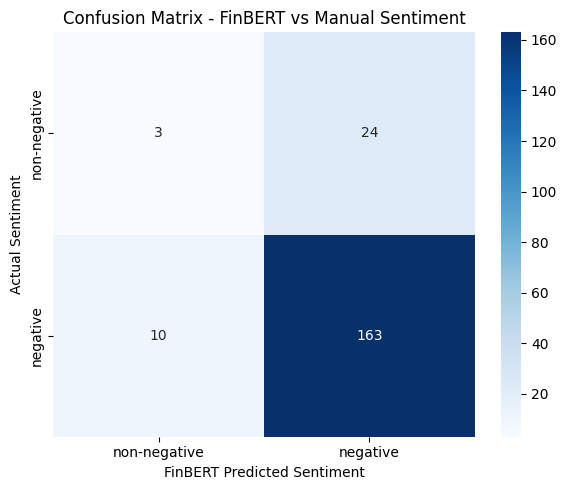


📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.94      0.91       173
non-negative       0.23      0.11      0.15        27

    accuracy                           0.83       200
   macro avg       0.55      0.53      0.53       200
weighted avg       0.79      0.83      0.80       200



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Drop any rows with missing sentiment values
Banking20Sample = Banking20Sample.dropna(subset=['FinBERTSentiment', 'ManualSentiment'])

# Convert sentiment columns to strings to avoid type mismatch issues during evaluation
y_true = Banking20Sample['ManualSentiment'].astype(str)
y_pred = Banking20Sample['FinBERTSentiment'].astype(str)

# Calculate accuracy score: proportion of correctly predicted sentiments
accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['non-negative', 'negative'])
labels = ['non-negative', 'negative']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - FinBERT vs Manual Sentiment")
plt.xlabel("FinBERT Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred))


In [ ]:
from transformers import pipeline

# # Initialize the FinBERT sentiment analysis pipeline with batch processing support
sentiment_analyzer = pipeline(
    "text-classification",
    model="yiyanghkust/finbert-tone", # Pretrained FinBERT model
    device=0 if torch.cuda.is_available() else -1,  # Use GPU if available, otherwise CPU (which is the case for this project)
    batch_size=32,  # Process 32 texts at once
    truncation=True,
    max_length=512
)

Device set to use cpu


In [ ]:
Banking20['FinBERTSentiment'] = Banking20['processed_text'].apply(get_sentiment)

In [ ]:
# Merge the positive and negative sentiment since they are both rare

Banking20['FinBERTSentiment'] = Banking20['FinBERTSentiment'].replace({
    'positive': 'non-negative',
    'neutral': 'non-negative'
})

In [ ]:
# Vizualize the first few rows
print(Banking20.head())

                                                  text  label  \
404  Last Saturday, I was charged extra for the exc...     17   
405  Hi, I am disappointed to see such a bad exchan...     17   
406  I think the currency exchange that's been appl...     17   
407  The exchange rate I was charged for a purchase...     17   
408  Can you please explain why the exchange rate f...     17   

                          intent_name  \
404  card_payment_wrong_exchange_rate   
405  card_payment_wrong_exchange_rate   
406  card_payment_wrong_exchange_rate   
407  card_payment_wrong_exchange_rate   
408  card_payment_wrong_exchange_rate   

                                        processed_text FinBERTSentiment  
404  last saturday charged extra exchange rate paym...         negative  
405  hi disappointed see bad exchange rate hope ass...     non-negative  
406        think currency exchange thats applied wrong         negative  
407               exchange rate charged purchase right         neg

In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


texts = Banking20['processed_text'].tolist()
labels = Banking20['label'].tolist()

# Encode labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# # Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)

# # Load DistilBERT tokenizer and model from Hugging Face
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Freeze the BERT model so its weights aren't updated during training to speeds up training while still using rich pre-trained embeddings
bert_model.trainable = False  # freeze transformer weights

# Function to tokenize input texts into BERT format (IDs + attention masks)
def tokenize_texts(texts):
    encodings = tokenizer(
        texts,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='tf'
    )
    return encodings

# Prepare datasets
train_encodings = tokenize_texts(X_train)
test_encodings = tokenize_texts(X_test)

# Build a simple classifier on top of DistilBERT embeddings
input_ids = tf.keras.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(128,), dtype=tf.int32, name='attention_mask')

# Get embeddings (last hidden state pooled)
outputs = bert_model(input_ids, attention_mask=attention_mask)
pooled_output = tf.reduce_mean(outputs.last_hidden_state, axis=1)  # mean pooling

# Simple Dense classifier
x = tf.keras.layers.Dense(128, activation='relu')(pooled_output)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')(x)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with tf.data.Dataset batching
batch_size = 16
train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    y_train
)).shuffle(1000).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']},
    y_test
)).batch(batch_size)

print("Starting training (Frozen DistilBERT embeddings + simple classifier)...")
model.fit(train_dataset, validation_data=test_dataset, epochs=1)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was tr

Starting training (Frozen DistilBERT embeddings + simple classifier)...
 91/211 [===========>..................] - ETA: 6:15 - loss: 3.0228 - accuracy: 0.0570

KeyboardInterrupt: 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Data
X = Banking20['processed_text']
y = Banking20['label']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
model = make_pipeline(TfidfVectorizer(max_features=5000, ngram_range=(1,2)),
                      LogisticRegression(max_iter=200))

# Build a scikit-learn pipeline that:
# 1. Converts text into TF-IDF feature vectors
# 2. Trains a Logistic Regression classifier on these vectors
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           5       0.86      0.97      0.91        33
           6       0.97      0.93      0.95        42
          15       0.80      0.97      0.88        40
          16       0.89      0.89      0.89        46
          17       0.92      0.91      0.92        54
          19       0.86      0.93      0.89        41
          20       0.79      0.94      0.86        32
          26       0.83      0.91      0.87        44
          28       0.93      0.84      0.88        44
          34       0.90      0.73      0.80        51
          45       0.88      0.85      0.86        33
          51       0.94      0.91      0.92        32
          52       0.84      0.91      0.88        47
          53       0.83      0.91      0.87        32
          63       0.90      0.88      0.89        41
          64       1.00      0.93      0.96        54
          66       0.93    

In [23]:
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack

# Assuming you have Banking20['processed_text'], ['FinBERTSentiment'], and ['label']

# Step 1: Prepare features
texts = Banking20['processed_text']
sentiments = Banking20['FinBERTSentiment'].map({'negative': 0, 'non-negative': 1})  # Binary encode
labels = Banking20['label']

# Step 2: Split data
X_train_text, X_test_text, X_train_sent, X_test_sent, y_train, y_test = train_test_split(
    texts, sentiments, labels, test_size=0.2, random_state=42
)

# Step 3: Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Step 4: Combine TF-IDF with sentiment (as sparse matrix column)
X_train_combined = hstack([X_train_tfidf, np.array(X_train_sent).reshape(-1, 1)])
X_test_combined = hstack([X_test_tfidf, np.array(X_test_sent).reshape(-1, 1)])

# Step 5: Train Logistic Regression
model = LogisticRegression(max_iter=300)
model.fit(X_train_combined, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test_combined)
print("✅ Model trained and evaluated successfully!\n")
print(classification_report(y_test, y_pred))



✅ Model trained and evaluated successfully!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           5       0.86      0.97      0.91        33
           6       0.98      0.95      0.96        42
          15       0.80      0.97      0.88        40
          16       0.87      0.89      0.88        46
          17       0.94      0.91      0.92        54
          19       0.81      0.93      0.86        41
          20       0.79      0.94      0.86        32
          26       0.83      0.89      0.86        44
          28       0.92      0.82      0.87        44
          34       0.90      0.73      0.80        51
          45       0.88      0.85      0.86        33
          51       0.94      0.91      0.92        32
          52       0.84      0.91      0.88        47
          53       0.83      0.91      0.87        32
          63       0.90      0.88      0.89        41
          64       1.00      0.93   

## **III. How can chatbot response strategies be adjusted based on predicted sentiment and intent categories in Banking77-style queries?**

In [24]:
# Get unique intent-sentiment combinations
pairs = Banking20[['intent_name', 'FinBERTSentiment']].drop_duplicates().sort_values(by=['intent_name', 'FinBERTSentiment']).reset_index(drop=True)

# Add an empty column for manual chatbot response entry
pairs['chatbot_response'] = ''

# Save and download to Excel
pairs.to_excel('IntentSentimentPairs.xlsx', index=False)
files.download('IntentSentimentPairs.xlsx')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Remove any existing 'IntentSentimentPairs.xlsx' file to avoid caching issues
!rm -f IntentSentimentPairs.xlsx
uploaded = files.upload()
responses_df = pd.read_excel('IntentSentimentPairs.xlsx')

# Merge responses into the main dataset based on (intent_name, FinBERTSentiment)
Banking20 = Banking20.merge(
    responses_df,
    on=['intent_name', 'FinBERTSentiment'],
    how='left'
)

# Show a few examples
Banking20[['text', 'intent_name', 'FinBERTSentiment', 'chatbot_response']].head(5)

Saving IntentSentimentPairs.xlsx to IntentSentimentPairs.xlsx


,text,intent_name,FinBERTSentiment,chatbot_response
0,"Last Saturday, I was charged extra for the exc...",card_payment_wrong_exchange_rate,negative,I am sorry to hear that the exchange rate is i...
1,"Hi, I am disappointed to see such a bad exchan...",card_payment_wrong_exchange_rate,non-negative,You can verify the exchange rate posted on our...
2,I think the currency exchange that's been appl...,card_payment_wrong_exchange_rate,negative,I am sorry to hear that the exchange rate is i...
3,The exchange rate I was charged for a purchase...,card_payment_wrong_exchange_rate,negative,I am sorry to hear that the exchange rate is i...
4,Can you please explain why the exchange rate f...,card_payment_wrong_exchange_rate,negative,I am sorry to hear that the exchange rate is i...


In [ ]:
print("Banking20 columns:", Banking20.columns.tolist())
print("responses_df columns:", responses_df.columns.tolist())


Banking20 columns: ['text', 'label', 'intent_name', 'processed_text', 'FinBERTSentiment', 'chatbot_response']
responses_df columns: ['intent_name', 'FinBERTSentiment', 'chatbot_response']


## **IV - Does sentiment-aware intent classification lead to better classification accuracy or fewer misclassifications in ambiguous queries?**

In [26]:
# Select 4 ambiguous intents from Banking 20

ambiguous_intents = ['reverted_card_payment?', 'card_payment_not_recognised', 'card_payment_fee_charged', 'pending_card_payment']

# Subset dataset
ambiguous_df = Banking20[Banking20['intent_name'].isin(ambiguous_intents)].copy()
print(f"Subset size: {len(ambiguous_df)}")


Subset size: 835


In [27]:
# Ensure binary encoding of FinBERT sentiment
ambiguous_df['sentiment_bin'] = ambiguous_df['FinBERTSentiment'].map({'negative': 0, 'non-negative': 1})


In [28]:
from sklearn.model_selection import train_test_split

X_text = ambiguous_df['processed_text']
y = ambiguous_df['intent_name']

# Train/test split
X_train_text, X_test_text, y_train, y_test, train_sent, test_sent = train_test_split(
    X_text, y, ambiguous_df['sentiment_bin'], test_size=0.2, random_state=42, stratify=y
)

In [29]:
# Logistic Regression on text only

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# TF-IDF + Logistic Regression
model1 = make_pipeline(
    TfidfVectorizer(max_features=3000),
    LogisticRegression(max_iter=300)
)

model1.fit(X_train_text, y_train)
y_pred1 = model1.predict(X_test_text)

print("📊 Model 1 — Text Only:\n")
print(classification_report(y_test, y_pred1))


📊 Model 1 — Text Only:

                             precision    recall  f1-score   support

   card_payment_fee_charged       1.00      1.00      1.00        45
card_payment_not_recognised       0.95      0.95      0.95        42
       pending_card_payment       1.00      1.00      1.00        40
     reverted_card_payment?       0.95      0.95      0.95        40

                   accuracy                           0.98       167
                  macro avg       0.98      0.98      0.98       167
               weighted avg       0.98      0.98      0.98       167



In [30]:
# Model 2 — Logistic Regression on text + sentiment

from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder

# TF-IDF on text
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Combine with sentiment
X_train_combined = hstack([X_train_tfidf, train_sent.values.reshape(-1,1)])
X_test_combined = hstack([X_test_tfidf, test_sent.values.reshape(-1,1)])

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train
model2 = LogisticRegression(max_iter=300)
model2.fit(X_train_combined, y_train_enc)
y_pred2 = model2.predict(X_test_combined)

print("📊 Model 2 — Text + Sentiment:\n")
print(classification_report(y_test_enc, y_pred2, target_names=le.classes_))


📊 Model 2 — Text + Sentiment:

                             precision    recall  f1-score   support

   card_payment_fee_charged       1.00      1.00      1.00        45
card_payment_not_recognised       0.93      0.95      0.94        42
       pending_card_payment       1.00      0.97      0.99        40
     reverted_card_payment?       0.93      0.93      0.93        40

                   accuracy                           0.96       167
                  macro avg       0.96      0.96      0.96       167
               weighted avg       0.96      0.96      0.96       167



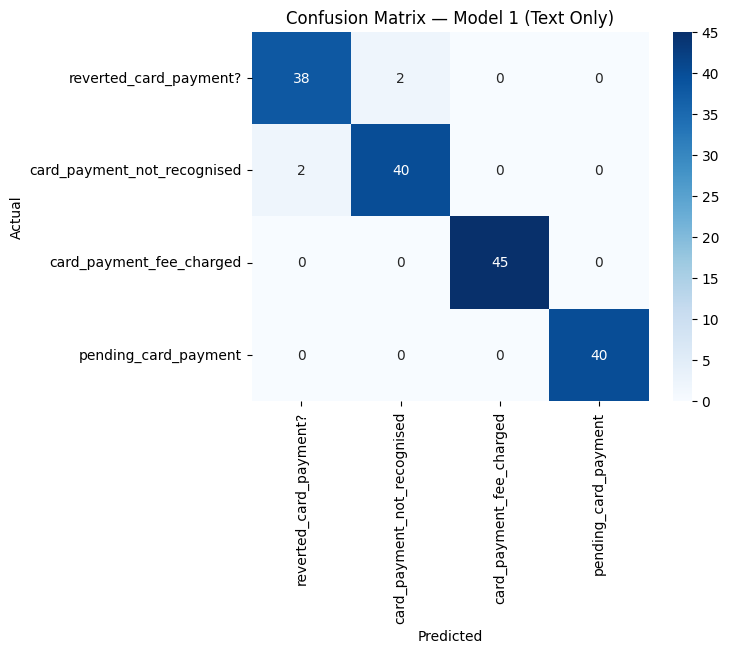

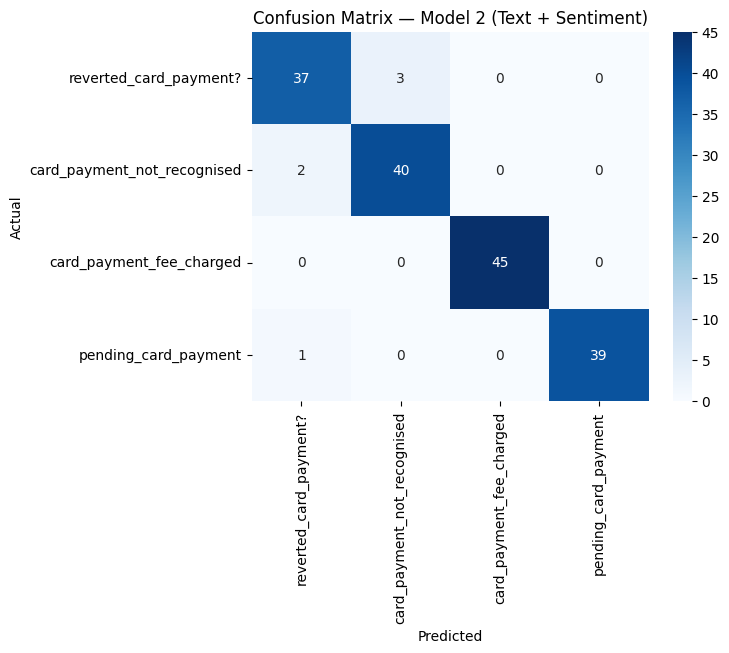

In [31]:
# Confusion Matrix comparison
def plot_conf_matrix(true, pred, labels, title):
    cm = confusion_matrix(true, pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot Model 1 (Text only)
plot_conf_matrix(y_test, y_pred1, labels=ambiguous_intents, title="Confusion Matrix — Model 1 (Text Only)")

# Plot Model 2 (Text + Sentiment)
plot_conf_matrix(le.inverse_transform(y_test_enc), le.inverse_transform(y_pred2), labels=ambiguous_intents, title="Confusion Matrix — Model 2 (Text + Sentiment)")
